In [1]:
from pyspark.sql import SparkSession 
spark=SparkSession.builder.appName('spark').getOrCreate()

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS ,ImageColorGenerator

In [3]:
mask = np.array(Image.open("./stormtrooper_mask.png"))

In [4]:
#text = open('bigdata.txt').read()
from operator import add
lines = spark.read.text('spark.txt').rdd.map(lambda r: r[0].lower())
counts = lines.flatMap(lambda x: x.split(' ')) \
              .map(lambda x: (x, 1)) \
              .reduceByKey(add)
df=counts.toDF()

In [5]:
data=df.select(df._1.alias('words'),df._2.alias('counts'))
data.createTempView("text")

In [11]:
spark.sql("select * from text where counts >5 and words <> '' order by counts desc ").show()

+-----------+------+
|      words|counts|
+-----------+------+
|        the|    60|
|      spark|    51|
|         of|    49|
|          a|    48|
|        and|    38|
|         in|    33|
|         to|    24|
|     apache|    22|
|         is|    21|
|         as|    21|
|        for|    16|
|         on|    16|
|       data|    16|
|         by|    15|
|distributed|    14|
|       that|    12|
|        can|    11|
|         be|    11|
|          =|    10|
|         //|    10|
+-----------+------+
only showing top 20 rows



In [15]:
data=spark.sql("select * from text where counts > 5 \
          and words not in ( '','the','of','a','in','and','to','is','as','on','by','for','be','at', \
          'that','can','=','//','are','was','an','such','or','with','which','it','its','this','has') \
          order by counts desc ")

In [16]:
pd=data.toPandas()

In [17]:
pd

,words,counts
0,spark,51
1,apache,22
2,data,16
3,distributed,14
4,rdd,9
5,val,9
6,machine,7
7,provides,7
8,algorithms,6
9,graphx,6


In [18]:
word_list=pd.words
count_list=pd.counts

In [19]:
dic=dict(zip(word_list,count_list))
#word_list

In [31]:
wc = WordCloud(max_words=20, mask=mask,background_color="white", repeat=True,width=600,height=600)

In [32]:
wc.generate_from_frequencies(dic)

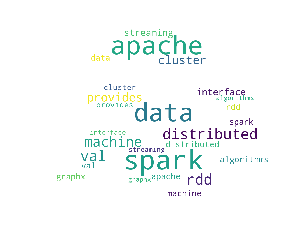

In [33]:
plt.imshow(wc)
plt.axis("off")  # 不显示坐标轴
plt.show()

In [23]:
wc.to_file('hdfs.png')